# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 1a - Random Forest Regressor

### Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

# TODO set features_dir 
features_dir = './data'


In [4]:
# import collegedatalib
import collegedatahelper

### Import Data (formated through library)

In [5]:
%%time
data_dict = collegedatahelper.create_data_dict(datadir, features_dir)

CPU times: user 3min 5s, sys: 27.3 s, total: 3min 33s
Wall time: 3min 5s


In [6]:
df = data_dict['2012_13']
df_13 = data_dict['2013_14']
df_new = data_dict['2017_18']

In [7]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = df_13['public']
df_priv = df_13['private']
df_priv_profit = df_13['private_for_profit']

In [8]:
for key in data_dict:
    print(key)
    print(data_dict[key]['public'].shape)
    print(data_dict[key]['private'].shape)
    print(data_dict[key]['private_for_profit'].shape)

2003_04
(1580, 417)
(1346, 417)
(1633, 417)
2005_06
(1591, 417)
(1343, 417)
(1902, 417)
2007_08
(1599, 417)
(1369, 417)
(2083, 417)
2009_10
(1621, 417)
(1395, 417)
(2346, 417)
2011_12
(1667, 417)
(1410, 417)
(2689, 417)
2012_13
(1662, 417)
(1411, 417)
(2759, 417)
2013_14
(1673, 417)
(1428, 417)
(2801, 417)
2014_15
(1669, 417)
(1439, 417)
(2780, 417)
1996_97
(2094, 1977)
(2057, 1977)
(2643, 1977)
1997_98
(2192, 1977)
(2020, 1977)
(2487, 1977)
1998_99
(2102, 1977)
(1985, 1977)
(2393, 1977)
1999_00
(2090, 1977)
(1936, 1977)
(2440, 1977)
2000_01
(2151, 1977)
(1930, 1977)
(2397, 1977)
2001_02
(2141, 1977)
(1991, 1977)
(2487, 1977)
2002_03
(2132, 1977)
(1968, 1977)
(2446, 1977)
2004_05
(2099, 1977)
(1952, 1977)
(2609, 1977)
2006_07
(2112, 1977)
(1942, 1977)
(2794, 1977)
2008_09
(2085, 1977)
(1899, 1977)
(2968, 1977)
2010_11
(2077, 1977)
(1915, 1977)
(3422, 1977)
2015_16
(2063, 1977)
(2007, 1977)
(3523, 1977)
2016_17
(2064, 1977)
(2009, 1977)
(3102, 1977)
2017_18
(2076, 1977)
(2041, 1977)
(29

# Random Forest

In [9]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [10]:
def fitRandomForestRegressor(df, train_features):
    # Instantiate model with 10 decision trees
    rf = RandomForestRegressor(n_estimators = 100, random_state = 42, oob_score=True)

    rf.fit(df[train_features], df['debt_to_income'])
    
    return rf


In [11]:
def getImportantFeatures(rf, df):
    important_features_dict = {}
    for x,i in enumerate(rf.feature_importances_):
        important_features_dict[x]=i


    important_features_list = sorted(important_features_dict,
                                     key=important_features_dict.get,
                                     reverse=True)
    
    top_features = df.columns[important_features_list]
    
    return top_features[:20]

In [12]:
%%time
print('Important Features for Public Colleges/Universities: ')
train_features_pub = list(df_pub.columns)
train_features_pub.remove('debt_to_income')
train_features_pub.remove('UNITID')

rf_pub = fitRandomForestRegressor(df_pub, train_features_pub)
top_features_pub = getImportantFeatures(rf_pub, df_pub)
print(top_features_pub)

Important Features for Public Colleges/Universities: 
Index(['SAT_AVG', 'PFTFTUG1_EF', 'ADM_RATE', 'UGDS_WHITE', 'UG_HISPOLD',
       'COSTT4_P', 'UG', 'PCIP49', 'UGDS_HISP', 'PPTUG_EF2', 'NUM45_OTHER',
       'UGDS_BLACK', 'RET_PTL4', 'UGDS_AIAN', 'TUITIONFEE_IN', 'UGDS_ASIAN',
       'PCIP13', 'NPT4_048_OTHER', 'NPT44_PUB', 'UGDS_NHPI'],
      dtype='object')
CPU times: user 8.67 s, sys: 64.6 ms, total: 8.74 s
Wall time: 8.2 s


In [13]:
%%time
print('Important Features for Private Colleges/Universities: ')
train_features_priv = list(df_priv.columns)
train_features_priv.remove('debt_to_income')
train_features_priv.remove('UNITID')

rf_priv = fitRandomForestRegressor(df_priv, train_features_priv)
top_features_priv = getImportantFeatures(rf_priv, df_priv)
print(top_features_priv)


Important Features for Private Colleges/Universities: 
Index(['PCIP49', 'COSTT4_P', 'PCIP22', 'ADM_RATE', 'PFTFTUG1_EF', 'UG_HISPOLD',
       'UGNONDS', 'UGDS_WHITE', 'NPT4_3075_PUB', 'NPT41_PRIV',
       'TUITIONFEE_PROG', 'RET_PTL4', 'UG', 'PCIP51', 'SAT_AVG', 'UGDS_BLACK',
       'CIP54BACHL', 'NPT4_048_PUB', 'PCIP01', 'UGDS_HISP'],
      dtype='object')
CPU times: user 7.22 s, sys: 43.6 ms, total: 7.26 s
Wall time: 6.8 s


In [14]:
%%time
print('Important Features for Private for Profit Colleges/Universities: ')
train_features_priv_profit = list(df_priv_profit.columns)
train_features_priv_profit.remove('debt_to_income')
train_features_priv_profit.remove('UNITID')

rf_priv_profit = fitRandomForestRegressor(df_priv_profit, train_features_priv_profit)
top_features_priv_profit = getImportantFeatures(rf_priv_profit, df_priv_profit)
print(top_features_priv_profit)

Important Features for Private for Profit Colleges/Universities: 
Index(['COSTT4_P', 'UG_HISPOLD', 'PCIP49', 'UGDS_MEN', 'UGNONDS', 'CIPCODE6',
       'RET_PTL4', 'TUITIONFEE_PROG', 'TUITIONFEE_IN', 'UG', 'UGDS_HISP',
       'UGDS_BLACK', 'RET_FT4', 'TUITIONFEE_OUT', 'CIPTFBSANNUAL6',
       'UGDS_WHITE', 'NUM41_PRIV', 'NUM45_PUB', 'CIP54BACHL', 'NUM4_PUB'],
      dtype='object')
CPU times: user 11.1 s, sys: 161 ms, total: 11.3 s
Wall time: 10.9 s


### Get OOB Score

In [15]:
print(rf_pub.oob_score_)
print(rf_priv.oob_score_)
print(rf_priv_profit.oob_score_)


0.7239250664183787
0.5585438475154625
0.4523158292716567


### Predicting NYU Debt-to-Income

In [16]:

nyu_data = {
    'year': [],
    'debt_to_income': [],
    'prediction': []
}

years =[ 
    '1996_97',
    '1997_98',
    '1998_99',
    '1999_00',
    '2000_01',
    '2001_02',
    '2002_03',
    '2003_04',
    '2004_05',
    '2005_06',
    '2006_07',
    '2007_08',
    '2008_09',
    '2009_10',
    '2010_11',
    '2011_12',
    '2012_13',
    '2013_14',
    '2014_15',
    '2015_16',
    '2016_17',
    '2017_18'
]
# for year in collegedatahelper.years_test:
for year in years:
    # Use the forest's predict method on the test data for each year
    df_test = data_dict[year]['private']
    df_test_nyu = df_test.loc[df_test['UNITID'] == 193900]
    df_test_nyu_condensed = df_test_nyu[train_features_priv]
    
    predictions = rf_priv.predict(df_test_nyu_condensed.fillna(0))

    if 'debt_to_income' in df_test_nyu.columns:
        nyu_data['year'].append(year)
        nyu_data['debt_to_income'].append(df_test_nyu['debt_to_income'].values[0])
        nyu_data['prediction'].append(predictions[0])
    else:
        nyu_data['year'].append(year)
        nyu_data['debt_to_income'].append(np.nan)
        nyu_data['prediction'].append(predictions[0])
    
    print(year, predictions[0])
# df_test.head()


1996_97 0.23677045313192444
1997_98 0.3258111810702706
1998_99 0.23628855599376425
1999_00 0.37184083429817333
2000_01 0.3254975569828749
2001_02 0.3844434049242784
2002_03 0.38582770459337395
2003_04 0.3952257047353098
2004_05 0.39325823646323294
2005_06 0.4004384784102026
2006_07 0.38511836445230285
2007_08 0.3994425087734293
2008_09 0.38065129155463573
2009_10 0.5323669602033303
2010_11 0.4491835735588138
2011_12 0.4374716623311143
2012_13 0.4487419674664394
2013_14 0.4332470373347848
2014_15 0.45396142897045216
2015_16 0.4524939153007201
2016_17 0.4514922667382222
2017_18 0.4302698069002164


In [17]:
nyu_data

{'year': ['1996_97',
  '1997_98',
  '1998_99',
  '1999_00',
  '2000_01',
  '2001_02',
  '2002_03',
  '2003_04',
  '2004_05',
  '2005_06',
  '2006_07',
  '2007_08',
  '2008_09',
  '2009_10',
  '2010_11',
  '2011_12',
  '2012_13',
  '2013_14',
  '2014_15',
  '2015_16',
  '2016_17',
  '2017_18'],
 'debt_to_income': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.3315727699530516,
  nan,
  0.32376126126126126,
  nan,
  0.3032700421940928,
  nan,
  0.3541521739130435,
  nan,
  0.4335253456221198,
  0.43333333333333335,
  0.4166666666666667,
  0.3936605316973415,
  nan,
  nan,
  nan],
 'prediction': [0.23677045313192444,
  0.3258111810702706,
  0.23628855599376425,
  0.37184083429817333,
  0.3254975569828749,
  0.3844434049242784,
  0.38582770459337395,
  0.3952257047353098,
  0.39325823646323294,
  0.4004384784102026,
  0.38511836445230285,
  0.3994425087734293,
  0.38065129155463573,
  0.5323669602033303,
  0.4491835735588138,
  0.4374716623311143,
  0.4487419674664394,
  0.43324703733

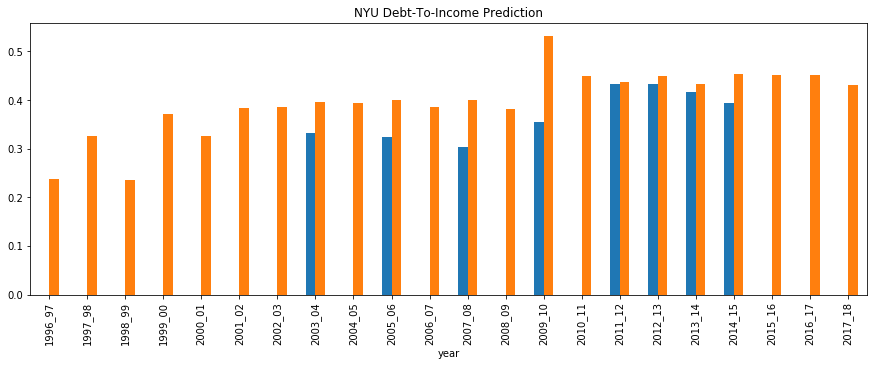

In [18]:
df_nyu = pd.DataFrame(nyu_data)

ax = df_nyu.plot.bar(
    x='year',
    title='NYU Debt-To-Income Prediction',
    legend=False,
    figsize=(15,5)
)


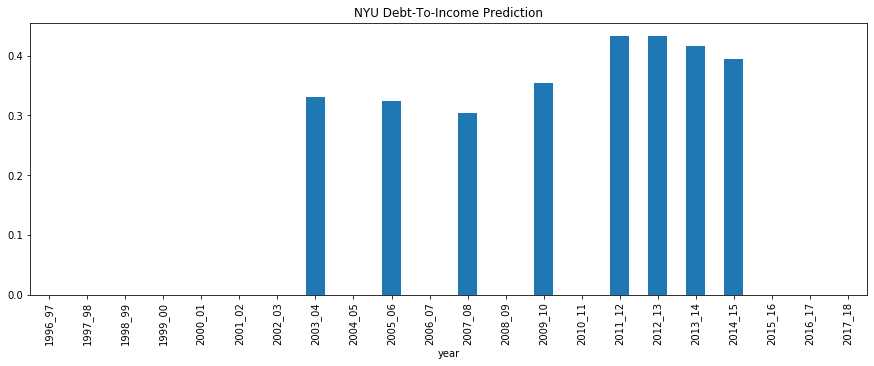

In [19]:
ax = df_nyu[['year', 'debt_to_income']].plot.bar(
    x='year',
    title='NYU Debt-To-Income Prediction',
    legend=False,
    figsize=(15,5)
)


## Predicting Debt-to-Income for other schools

In [20]:
def predict(uuid):
    data = {
        'year': [],
        'debt_to_income': [],
        'prediction': []
    }

    years =[ 
        '1996_97',
        '1997_98',
        '1998_99',
        '1999_00',
        '2000_01',
        '2001_02',
        '2002_03',
        '2003_04',
        '2004_05',
        '2005_06',
        '2006_07',
        '2007_08',
        '2008_09',
        '2009_10',
        '2010_11',
        '2011_12',
        '2012_13',
        '2013_14',
        '2014_15',
        '2015_16',
        '2016_17',
        '2017_18'
    ]

    for year in years:
        # Use the forest's predict method on the test data for each year
        df_test = data_dict[year]['private']
        df_test_school = df_test.loc[df_test['UNITID'] == uuid]
        df_test_school_condensed = df_test_school[train_features_priv]

        predictions = rf_priv.predict(df_test_school_condensed.fillna(0))

        if 'debt_to_income' in df_test_school.columns:
            data['year'].append(year)
            data['debt_to_income'].append(df_test_school['debt_to_income'].values[0])
            data['prediction'].append(predictions[0])
        else:
            data['year'].append(year)
            data['debt_to_income'].append(np.nan)
            data['prediction'].append(predictions[0])
        
    df_school = pd.DataFrame(data)

    ax = df_nyu.plot.bar(
        x='year',
        title = str(uuid) + ' Debt-To-Income Prediction',
        legend=False,
        figsize=(15,5)
    )
#         print(year, predictions[0])
# df_test.head()

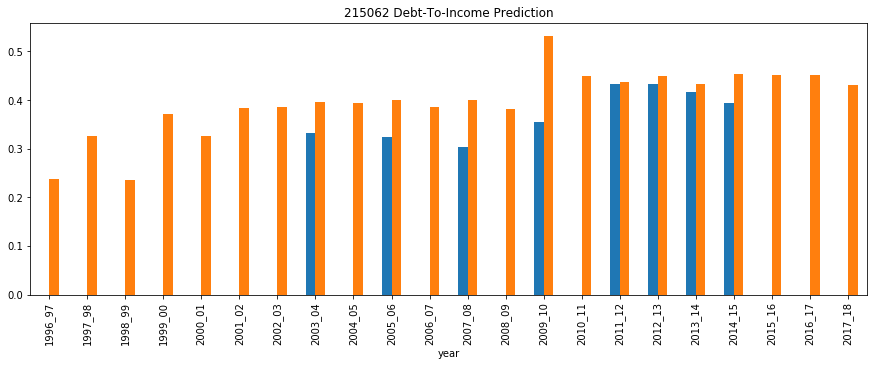

In [21]:
# University of Pennsylvania
predict(215062)

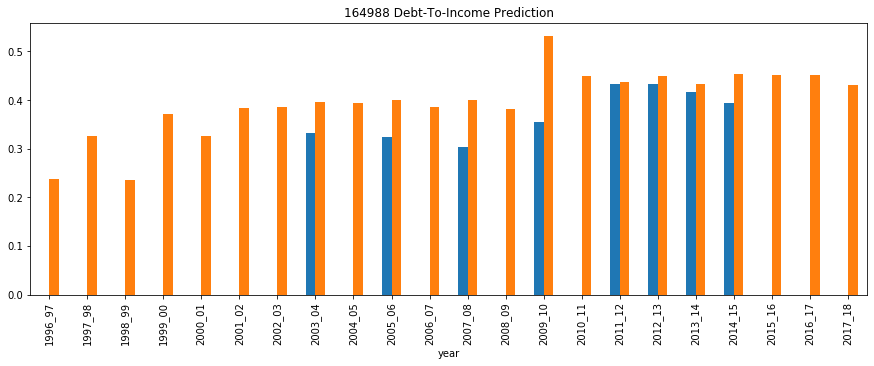

In [22]:
# Boston University
predict(164988)

In [23]:
# University of Iowa
# predict(153658)